In [16]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from sklearn.decomposition import PCA

In [2]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

%cd '/content/gdrive/MyDrive'


Mounted at /content/gdrive/
/content/gdrive/MyDrive


In [3]:
data_train=pd.read_csv("penguins_train.csv")

In [17]:
data

,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Species,Biscoe,Dream,Torgersen,FEMALE,MALE
0,1,-0.966883,0.031701,-1.514730,-0.488837,1.577495,0.470944,Adelie Penguin (Pygoscelis adeliae),1,0,0,0,1
1,1,-0.551558,0.750130,-0.869003,-1.076278,1.015066,-0.531740,Adelie Penguin (Pygoscelis adeliae),0,0,1,0,1
2,1,-0.930768,0.185650,-1.084245,-0.798017,-0.317952,-0.496692,Adelie Penguin (Pygoscelis adeliae),1,0,0,1,0
3,0,-0.804364,0.390916,-0.582013,0.067685,0.899516,-0.266582,Adelie Penguin (Pygoscelis adeliae),0,1,0,0,1
4,1,0.604127,-1.507789,0.565946,0.500536,-0.635768,-1.391917,Gentoo penguin (Pygoscelis papua),1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,1,0.044342,0.083018,1.283421,1.304402,-1.089465,-1.396421,Gentoo penguin (Pygoscelis papua),1,0,0,0,1
270,1,-1.400265,-0.070931,-0.438518,-1.076278,0.758860,0.555968,Adelie Penguin (Pygoscelis adeliae),0,1,0,1,0
271,1,-0.352925,0.698814,-1.514730,-0.798017,-1.248533,0.224856,Adelie Penguin (Pygoscelis adeliae),0,1,0,1,0
272,1,-1.147459,0.596181,-1.945215,-0.983524,-0.023874,0.727118,Adelie Penguin (Pygoscelis adeliae),1,0,0,1,0


In [30]:
def preprocess(data):
  data=data.dropna()
  encoder=preprocessing.LabelEncoder()
  std=preprocessing.StandardScaler()
  data['Culmen Length (mm)']=std.fit_transform(data[['Culmen Length (mm)']])
  data['Culmen Depth (mm)']=std.fit_transform(data[['Culmen Depth (mm)']])
  data['Flipper Length (mm)']=std.fit_transform(data[['Flipper Length (mm)']])
  data['Body Mass (g)']=std.fit_transform(data[['Body Mass (g)']])
  data['Delta 15 N (o/oo)']=std.fit_transform(data[['Delta 15 N (o/oo)']])

  data['Delta 13 C (o/oo)']=std.fit_transform(data[['Delta 13 C (o/oo)']])
  one_hot = pd.get_dummies(data['Island'])

  data=data.drop('Island',axis=1)
  data=data.join(one_hot)
  encoder=preprocessing.LabelEncoder()
  data['Clutch Completion']=encoder.fit_transform(data['Clutch Completion'])
  one_hot = pd.get_dummies(data['Sex'])
  data=data.join(one_hot)
  data=data.drop(['Sex','.'],axis=1)


  return data

In [35]:
data=preprocess(data_train)
encoder=preprocessing.LabelEncoder()
X=data.drop('Species',axis=1)
pca = PCA(n_components=7)
X=pca.fit_transform(X)

Y=encoder.fit_transform(data['Species'])

<ipython-input-30-9b65d3e5c1d8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Culmen Length (mm)']=std.fit_transform(data[['Culmen Length (mm)']])
<ipython-input-30-9b65d3e5c1d8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Culmen Depth (mm)']=std.fit_transform(data[['Culmen Depth (mm)']])
<ipython-input-30-9b65d3e5c1d8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=17)

In [43]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from collections import Counter

class RandomForest:
    def __init__(self, n_trees=11, max_depth=None, min_samples_split=2, n_feature=None):
        self.n_trees = n_trees
        self.max_depth=max_depth
        self.min_samples_split=min_samples_split
        self.n_features=n_feature
        self.trees = []
        np.random.seed(42);

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTreeClassifier(max_depth=self.max_depth,min_samples_split=self.min_samples_split,criterion="entropy")
            X_sample, y_sample = self._bootstrap_samples(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def _bootstrap_samples(self, X, y):
        n_samples = X.shape[0]

        idxs = np.random.choice(n_samples, n_samples, replace=True,)
        return X[idxs,:], y[idxs]

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(predictions, 0, 1)
        predictions = np.array([self._most_common_label(pred) for pred in tree_preds])
        return predictions

In [44]:
rf=RandomForest()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print(classification_report(encoder.inverse_transform(y_pred),encoder.inverse_transform(y_test)))

                                           precision    recall  f1-score   support

      Adelie Penguin (Pygoscelis adeliae)       1.00      0.89      0.94        18
Chinstrap penguin (Pygoscelis antarctica)       0.82      1.00      0.90         9
        Gentoo penguin (Pygoscelis papua)       1.00      1.00      1.00        25

                                 accuracy                           0.96        52
                                macro avg       0.94      0.96      0.95        52
                             weighted avg       0.97      0.96      0.96        52



In [52]:
t=[]
for i in range(len(y_pred)):
  t.append({"actual":encoder.inverse_transform(y_test)[i],"predicted":encoder.inverse_transform(y_pred)[i]})
t

[{'actual': 'Adelie Penguin (Pygoscelis adeliae)',
  'predicted': 'Adelie Penguin (Pygoscelis adeliae)'},
 {'actual': 'Adelie Penguin (Pygoscelis adeliae)',
  'predicted': 'Adelie Penguin (Pygoscelis adeliae)'},
 {'actual': 'Chinstrap penguin (Pygoscelis antarctica)',
  'predicted': 'Adelie Penguin (Pygoscelis adeliae)'},
 {'actual': 'Gentoo penguin (Pygoscelis papua)',
  'predicted': 'Gentoo penguin (Pygoscelis papua)'},
 {'actual': 'Gentoo penguin (Pygoscelis papua)',
  'predicted': 'Gentoo penguin (Pygoscelis papua)'},
 {'actual': 'Adelie Penguin (Pygoscelis adeliae)',
  'predicted': 'Adelie Penguin (Pygoscelis adeliae)'},
 {'actual': 'Gentoo penguin (Pygoscelis papua)',
  'predicted': 'Gentoo penguin (Pygoscelis papua)'},
 {'actual': 'Gentoo penguin (Pygoscelis papua)',
  'predicted': 'Gentoo penguin (Pygoscelis papua)'},
 {'actual': 'Gentoo penguin (Pygoscelis papua)',
  'predicted': 'Gentoo penguin (Pygoscelis papua)'},
 {'actual': 'Gentoo penguin (Pygoscelis papua)',
  'predicte

In [45]:
encoder.classes_

array(['Adelie Penguin (Pygoscelis adeliae)',
       'Chinstrap penguin (Pygoscelis antarctica)',
       'Gentoo penguin (Pygoscelis papua)'], dtype=object)

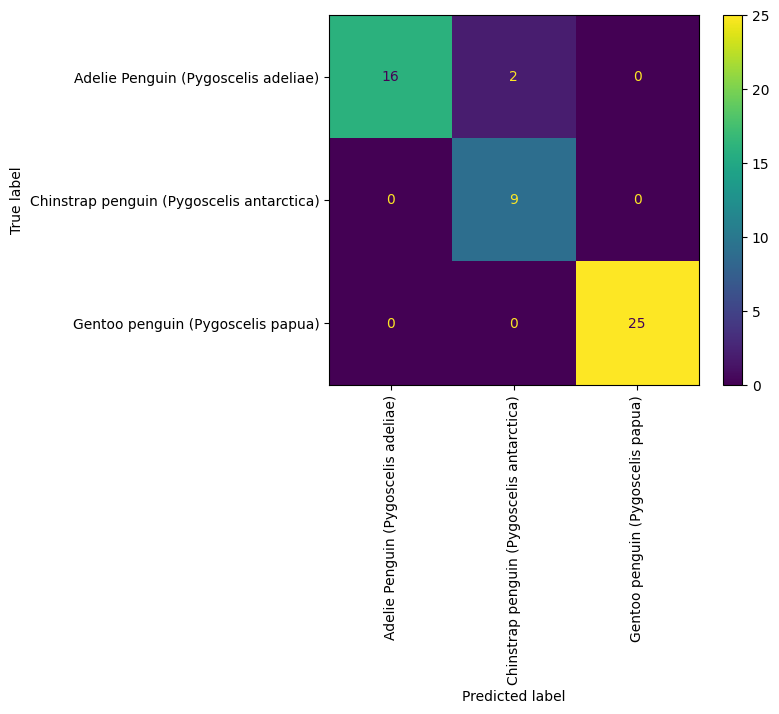

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_predictions(encoder.inverse_transform(y_pred),encoder.inverse_transform(y_test),display_labels=encoder.classes_,xticks_rotation="vertical")

plt.show()

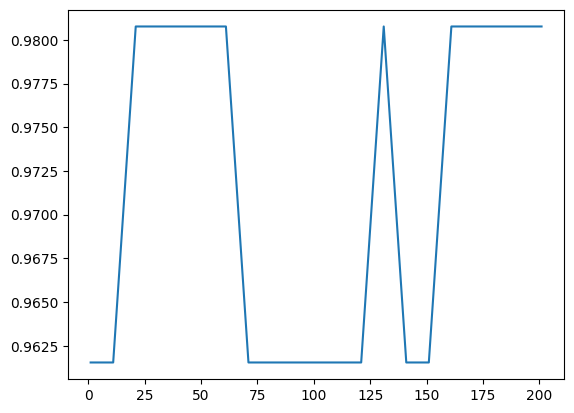

In [48]:
num_trees=[1,11,21,31,41,51,61,71,81,91,101,111,121,131,141,151,161,171,181,191,201,]
score=[]
for i in num_trees:
  rf=RandomForest(n_trees=i)
  rf.fit(X_train,y_train)
  y_pred=rf.predict(X_test)
  score.append(accuracy_score(y_test,y_pred))
plt.plot(num_trees,score)
plt.show()